In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
from sklearn.manifold import MDS, Isomap, TSNE
from scipy.spatial.distance import pdist, squareform

In [2]:
disto = np.load('./pairwise_distogram_Rg_20.npy')
bins = np.load('./distogram_bins.npy')

In [3]:
disto.shape

(21, 21, 217)

In [4]:
bins.shape

(218,)

In [5]:
np.sum(disto)

322672546.0

In [6]:
bins.shape

key = ['ALA',
 'ARG',
 'ASN',
 'ASP',
 'CYS',
 'GLU',
 'GLN',
 'GLY',
 'HIS',
 'ILE',
 'LEU',
 'LYS',
 'MET',
 'PHE',
 'PRO',
 'SER',
 'THR',
 'TRP',
 'TYR',
 'VAL',
 'X']

In [7]:
hydropho = {}
hydropho['CYS'] = 1
hydropho['PHE'] = 2
hydropho['ILE'] = 2
hydropho['VAL'] = 3
hydropho['LEU'] = 4
hydropho['MET'] = 4
hydropho['TRP'] = 4
hydropho['HIS'] = 5
hydropho['TYR'] = 6
hydropho['ALA'] = 7
hydropho['GLY'] = 8
hydropho['THR'] = 9
hydropho['SER'] = 10
hydropho['PRO'] = 11
hydropho['ARG'] = 11
hydropho['ASN'] = 12
hydropho['GLN'] = 13
hydropho['ASP'] = 13
hydropho['GLU'] = 13
hydropho['LYS'] = 14

In [8]:
def KL(P,Q):
    epsilon = 1e-6
    P = P+epsilon
    Q = Q+epsilon
    divergence = np.sum(P*np.log(P/Q))
    return divergence

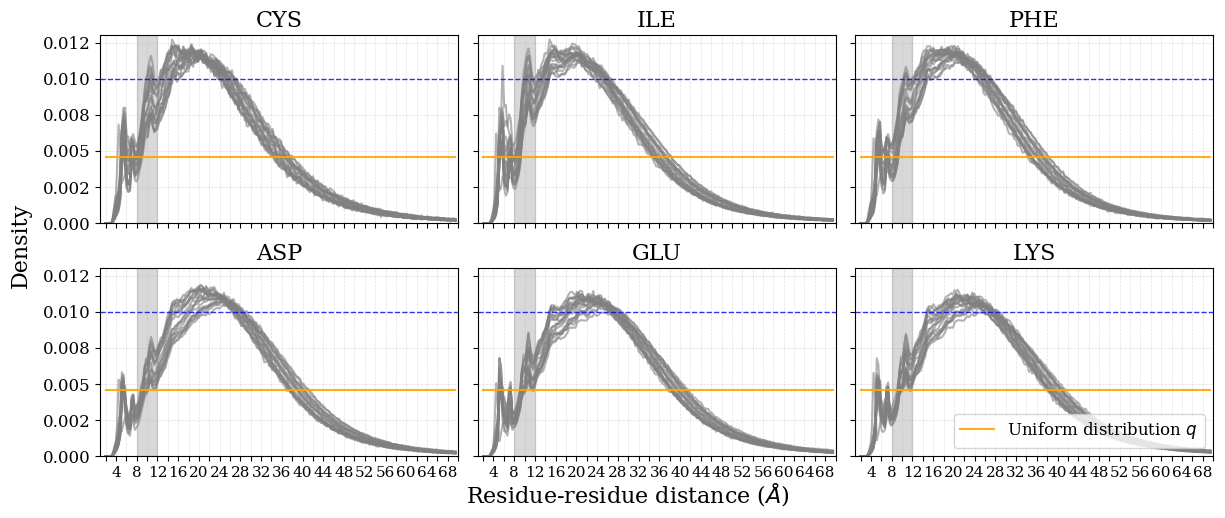

In [9]:
dist = []
dist_KL = []
plt.rc('font', family='serif')
#fig, axs = plt.subplots(4, 5, figsize=(26,8), sharex=True, sharey=True)
k = 0
l = 0

#plt.figure(figsize=(8,4))
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(12, 5))

#amino = ['CYS', 'ILE', 'PHE', 'PRO', 'GLY', 'TRP']
amino = ['CYS', 'ILE', 'PHE', 'ASP', 'GLU', 'LYS']

for k, amino in enumerate(amino):
    for i in range(20):
        for j in range(20):
            if i < j:
                p_ij = 0.5*(disto[i, j] / np.sum(disto[i, j]) + disto[j, i] / np.sum(disto[j, i]))
                #p_ij = disto[i, j] / np.sum(disto[i, j])
                x = bins[:-1]
                ref = np.ones(len(x)) / len(x)

                if key[i] == amino or key[j] == amino:
                    # subplot
                    axes[k//3][k%3].plot(x, p_ij, alpha=0.6, color='gray')
                
                if k == 0:
                    #mode = np.argmax(p_ij)
                    #dist.append(mode)
                    dist_KL.append(KL(p_ij, ref))
                    dist.append(stats.wasserstein_distance(x, x, p_ij, ref))
                
    axes[k//3][k%3].axhline(y=0.010, linestyle='--', linewidth=1., alpha=0.8, color='blue')
    axes[k//3][k%3].set_title(amino, fontsize=16)
    ytick = np.asarray([i for i in range(0, 150, 25)]) * 1e-4
    axes[k//3][k%3].set_yticks(ytick, [f"{np.round(j,3) :.3f}" for j in ytick], fontsize=12)
    axes[k//3][k%3].set_xticks([i for i in range(0, 71, 2)], labels= [f'{i}' if i%4 == 0 else f' ' for i in range(0, 71, 2)], fontsize=11)
    axes[k//3][k%3].grid(True, linewidth=.5, alpha=0.4, linestyle='--')
    axes[k//3][k%3].axvspan(8, 12, color='gray', alpha=0.3)

    axes[k//3][k%3].plot(x, ref, color='orange', alpha=0.9, label=r"Uniform distribution $q$")
fig.text(0.5, -0.015, r'Residue-residue distance ($\AA$)', ha='center',fontsize=16)
fig.text(-0.015, 0.5, r'Density', va='center', rotation='vertical', fontsize=16)
fig.tight_layout()
axes[1][2].legend(fontsize=12, loc="lower right")
plt.ylim([0,0.013])
#plt.xticks([i for i in range(0, 71, 2)], labels= [f'{i}' if i%4 == 0 else f' ' for i in range(0, 71, 2)])
#axes.set_xticklabels([i for i in range(1, 74, 2)], [i for i in range(0, 70, 5)])
plt.xlim([1,70])

dist = np.asarray(dist)
dist_KL = np.asarray(dist_KL)
#plt.savefig(f'./residue_dists.pdf', format='pdf', bbox_inches="tight", dpi=300)
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler

gamma = 0.0

scaler = MinMaxScaler()
scaled_distances = scaler.fit_transform(dist.reshape(-1, 1)) + gamma
scaled_dist_mat = squareform(scaled_distances.ravel())

#np.save('./wass_pdist.npy', scaled_dist_mat)

In [11]:
scaler_KL = MinMaxScaler()
scaled_distances_KL = scaler_KL.fit_transform(dist_KL.reshape(-1, 1)) + gamma
scaled_dist_mat_KL = squareform(scaled_distances_KL.ravel())

#np.save('./wass_pdist.npy', scaled_dist_mat)

In [12]:
scaled_dist_mat_KL

array([[0.        , 0.49482469, 0.45943292, 0.48783332, 0.76147789,
        0.37274976, 0.35297663, 0.62829498, 0.67960912, 0.78240212,
        0.70787271, 0.31491307, 0.70053199, 0.81325177, 0.48637747,
        0.48544086, 0.52297736, 0.78428407, 0.71513786, 0.7415861 ],
       [0.49482469, 0.        , 0.31119301, 0.30892065, 0.61113543,
        0.15710972, 0.19424369, 0.49774574, 0.5318766 , 0.67199105,
        0.59295289, 0.18856195, 0.57236088, 0.70491233, 0.33531484,
        0.34992563, 0.39991587, 0.62442843, 0.57022164, 0.65762002],
       [0.45943292, 0.31119301, 0.        , 0.28400952, 0.54332769,
        0.18448483, 0.17917601, 0.43932376, 0.46694999, 0.62803698,
        0.56254189, 0.14981516, 0.55352057, 0.67545645, 0.28192884,
        0.27271907, 0.29273802, 0.65066943, 0.55072503, 0.59784343],
       [0.48783332, 0.30892065, 0.28400952, 0.        , 0.66021694,
        0.25891859, 0.2392618 , 0.47817774, 0.50675256, 0.68380582,
        0.61919129, 0.13379127, 0.60809929, 0

In [21]:
import scipy
embedding_results = scipy.io.loadmat('amino_acid_embedding.mat')
embedding = embedding_results['Y_new1']
embedding_KL = embedding_results['Y_new2']

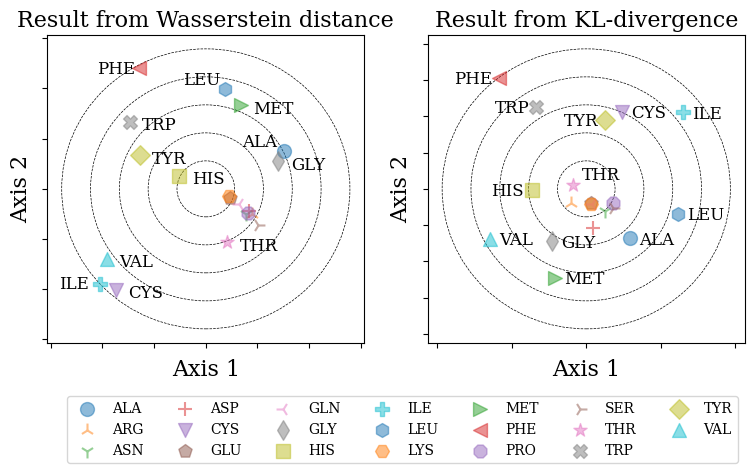

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
markers = ['o', '2', '1', '+', 'v', 'p', '3', 'd', 's', 'P',  
           'h', 'H', '>', '<', '8', '4', '*', 'X', 'D', '^']
idx0=0
idx1=1
texts = ['PHE', 'ILE', 'CYS', 'VAL', 'LEU', 'MET', 'TRP', 'HIS', 'TYR', 'ALA', 'GLY', 'THR']
for i in range(20):
    axes[0].scatter(embedding[i, idx0], embedding[i, idx1], s=100, alpha=0.5, 
                       marker=markers[i], label=key[i])
    if key[i]=='PHE':
        axes[0].text(embedding[i, idx0]-0.4, embedding[i, idx1]-0.05, key[i], fontsize=12)
    elif key[i]=='ILE':
        axes[0].text(embedding[i, idx0]-0.4, embedding[i, idx1]-0.05, key[i], fontsize=12)
    elif key[i]=='ALA':
        axes[0].text(embedding[i, idx0]-0.4, embedding[i, idx1]+0.05, key[i], fontsize=12)
    elif key[i]=='LEU':
        axes[0].text(embedding[i, idx0]-0.4, embedding[i, idx1]+0.05, key[i], fontsize=12)
    elif key[i] in texts:
        axes[0].text(embedding[i, idx0]+0.12, embedding[i, idx1]-0.08, key[i], fontsize=12)


r_max = np.max(np.linalg.norm(embedding, axis=-1))
for i in range(5):
    circle = plt.Circle((0,0), radius=r_max/5*(i+1), color='k', ls='--', fill=False, zorder=-1, lw=0.5)
    axes[0].add_patch(circle)
    
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].set_title('Result from Wasserstein distance', fontsize=16)
axes[0].set_xlabel('Axis 1', fontsize=16)
axes[0].set_ylabel('Axis 2', fontsize=16)

for i in range(20):
    axes[1].scatter(embedding_KL[i, idx0], embedding_KL[i, idx1], s=100, alpha=0.5, 
                       marker=markers[i], label=key[i])
    if key[i] == 'HIS':
        axes[1].text(embedding_KL[i, idx0]-0.55, embedding_KL[i, idx1]-0.08, key[i], fontsize=12)
    elif key[i] == 'TYR':
        axes[1].text(embedding_KL[i, idx0]-0.55, embedding_KL[i, idx1]-0.08, key[i], fontsize=12)
    elif key[i] == 'TRP':
        axes[1].text(embedding_KL[i, idx0]-0.55, embedding_KL[i, idx1]-0.08, key[i], fontsize=12)
    elif key[i] == 'PHE':
        axes[1].text(embedding_KL[i, idx0]-0.6, embedding_KL[i, idx1]-0.08, key[i], fontsize=12)
    elif key[i] == 'THR':
        axes[1].text(embedding_KL[i, idx0]+0.12, embedding_KL[i, idx1]+0.08, key[i], fontsize=12)
    elif key[i] in texts:
        axes[1].text(embedding_KL[i, idx0]+0.12, embedding_KL[i, idx1]-0.08, key[i], fontsize=12)
    # elif key[i]=='ILE':
    #     axes[1].text(embedding_KL[i, idx0]+0.05, embedding_KL[i, idx1]-0.05, key[i], fontsize=15)
    # elif key[i]=='CYS':
    #     axes[1].text(embedding_KL[i, idx0]+0.05, embedding_KL[i, idx1]-0.05, key[i], fontsize=15)

r_max = np.max(np.linalg.norm(embedding_KL, axis=-1))
for i in range(5):
    circle = matplotlib.patches.Circle((0,0), radius=r_max/5*(i+1), color='k', ls='--', fill=False, zorder=-1, lw=0.5)
    axes[1].add_patch(circle)
axes[1].set_xticklabels([])
axes[1].set_yticklabels([])
axes[1].set_title('Result from KL-divergence', fontsize=16)
axes[1].set_xlabel('Axis 1', fontsize=16)
axes[1].set_ylabel('Axis 2', fontsize=16)


plt.legend(bbox_to_anchor=(1.0, -0.15), ncol=7)
# plt.savefig(f'./isoembeddings.pdf', format='pdf', bbox_inches="tight", dpi=300)
plt.show()